<a href="https://colab.research.google.com/github/raita0100/stock_prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Extract the stock price

In [0]:
#import libraries
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 11)

df = web.DataReader('AAPL', 'yahoo', start, end)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.195114
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.897146
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.262434
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,26.110340


###Exploring Rolling Mean and Return Rate of Stocks

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
2010-01-11           NaN
2010-01-12           NaN
2010-01-13           NaN
2010-01-14           NaN
2010-01-15           NaN
2010-01-19           NaN
2010-01-20           NaN
2010-01-21           NaN
2010-01-22           NaN
2010-01-25           NaN
2010-01-26           NaN
2010-01-27           NaN
2010-01-28           NaN
2010-01-29           NaN
2010-02-01           NaN
2010-02-02           NaN
2010-02-03           NaN
2010-02-04           NaN
2010-02-05           NaN
2010-02-08           NaN
2010-02-09           NaN
2010-02-10           NaN
2010-02-11           NaN
2010-02-12           NaN
2010-02-16           NaN
                 ...    
2017-11-29    154.933966
2017-11-30    155.200798
2017-12-01    155.457813
2017-12-04    155.683044
2017-12-05    155.894446
2017-12-06    156.094690
2017-12-07    156.292927
2017-12-08    156.482569
2017-12-11    156.71

####plotting the moving avarage with actual data

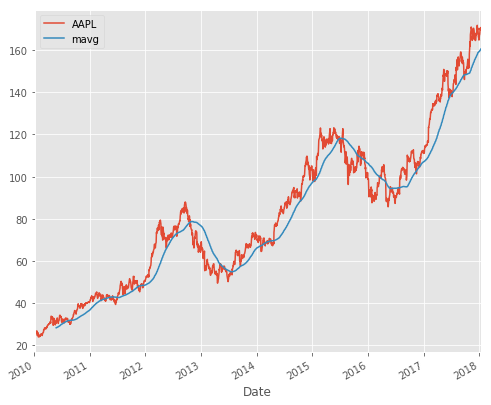

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#adjusting the size of matoplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib to grid plot
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

###Return Deviation — to determine risk and return

$$r_t = (p_t-p_t-1)/(p_t-1) = p_t/(p_t-1) - 1$$

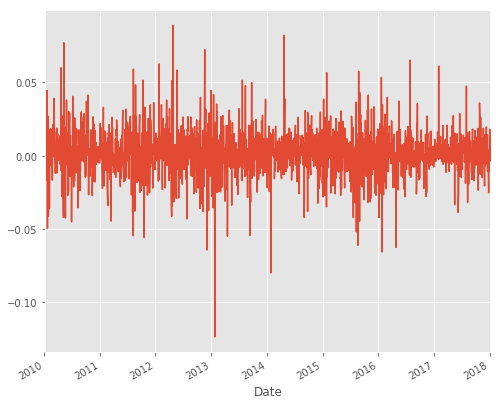

In [0]:
rets = close_px / close_px.shift(1) -1
rets.plot(label='return')

###Competitores Sock

In [0]:
dfcomf = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start=start, end=end)['Adj Close']

In [0]:
dfcomf.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,26.681330,10.781219,312.204773,98.142967,24.443624
2010-01-05,26.727465,10.837044,310.829926,96.957375,24.451517
2010-01-06,26.302330,10.781219,302.994293,96.327530,24.301458
2010-01-07,26.253704,11.339470,295.940735,95.994110,24.048725
2010-01-08,26.428249,11.583703,299.885956,96.957375,24.214581


###Correlation Analysis

In [0]:
retscomp = dfcomf.pct_change()
corr = retscomp.corr()
corr.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.348559,0.416191,0.354542,0.396283
GE,0.348559,1.000000,0.386837,0.499171,0.429622
GOOG,0.416191,0.386837,1.000000,0.380120,0.480058
IBM,0.354542,0.499171,0.380120,1.000000,0.465419
MSFT,0.396283,0.429622,0.480058,0.465419,1.000000


Text(0, 0.5, 'Return GE')

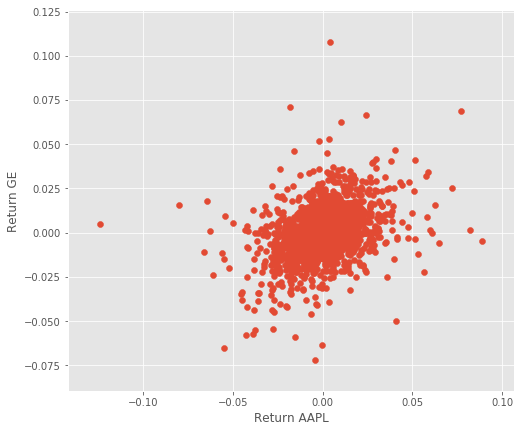

In [0]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Return AAPL')
plt.ylabel('Return GE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cce850160>,
      dtype=object)

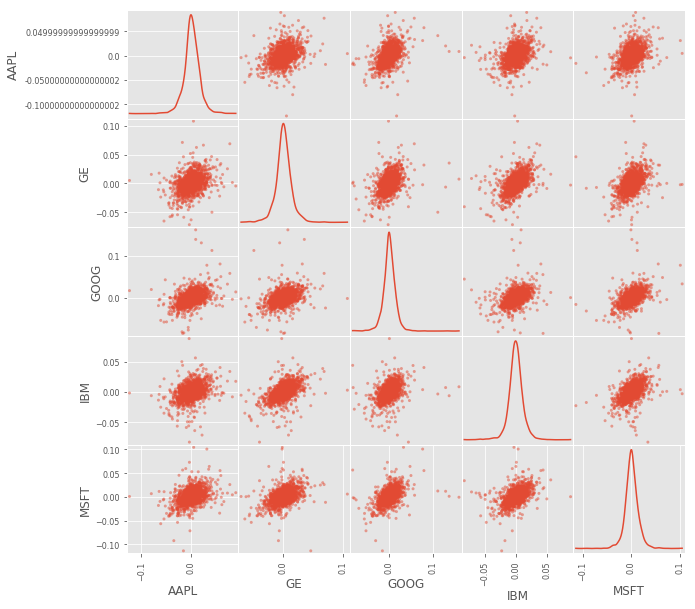

In [0]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10,10))

###heat map to visualize

([<matplotlib.axis.YTick at 0x7f3cc5cd77b8>,
 <a list of 5 Text yticklabel objects>)

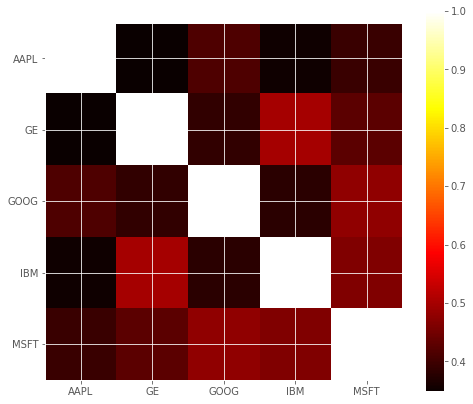

In [0]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

###Stocks Returns Rate and Risk

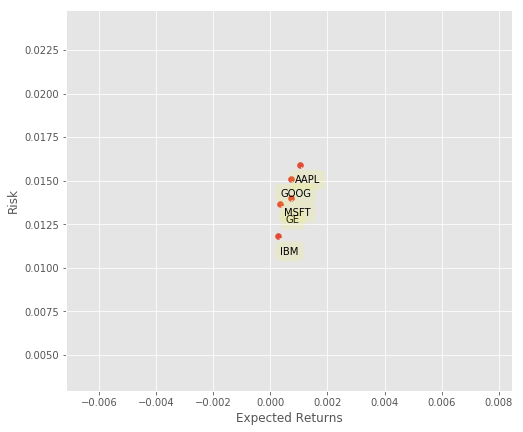

In [0]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(
      label,
      xy = (x, y), xytext = (20, -20),
      textcoords='offset points', ha = 'right', va = 'bottom',
      bbox = dict(boxstyle = 'round, pad=0.5', fc = 'yellow', alpha = 0.1),
      arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
  ) 

#Predicting Stock Price

###MAchine learning models to use
* Simple Linear Analysis
* Quadratic Discriminent analysis (QDA)
* K nearest neighbor (KNN)

####HIgh low percentage and percentae change

In [0]:
dfreg = df.loc[:, ['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head() 

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864


###Pre-processing & Cross Validation

1. Drop missing value
2. Separating the label here, we want to predict the AdjClose
3. Scale the X so that everyone can have the same distribution for linear regression.
4. Finally We want to find Data Series of late X and early X (train) for model generation and evaluation.
5. Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split

In [0]:
import math
import numpy as np
# Drop Missing values
dfreg.fillna(value=-99999, inplace=True)

# we want to separate the 1 percent of the data to the forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X

array([[ 2.66813297e+01,  1.23432400e+08,  9.90605642e-01,
         2.71751829e-01],
       [ 2.67274647e+01,  1.50476200e+08,  1.09151984e+00,
        -1.02518657e-01],
       [ 2.63023300e+01,  1.38040000e+08,  2.12352269e+00,
        -1.59063254e+00],
       ...,
       [ 1.69717117e+02,  2.15840000e+07,  9.46477301e-01,
        -1.26039082e-01],
       [ 1.69678162e+02,  2.39599000e+07,  7.45885078e-01,
         6.52569647e-01],
       [ 1.70641968e+02,  1.86677000e+07,  5.70515750e-01,
         3.95213045e-01]])

In [0]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [0]:
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
X = preprocessing.scale(X)
X

array([[-1.52415258,  0.62350856, -0.74992557,  0.21968378],
       [-1.52287385,  1.06938517, -0.66173266, -0.07289208],
       [-1.53465734,  0.86434702,  0.24017542, -1.23618498],
       ...,
       [ 2.44037967, -1.05568665, -0.78849107, -0.09127854],
       [ 2.43929993, -1.0165147 , -0.96379654,  0.51737784],
       [ 2.46601381, -1.10376828, -1.11705873,  0.31619625]])

In [0]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluatio
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

Dimension of X (2000, 4)
Dimension of y (2000,)


In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
print(X_train[:10])
print(y_train[:10])

[[-1.35113138  0.99876553 -0.12643794  0.96915971]
 [ 1.03467498 -0.79072906  0.1170008   1.01064026]
 [ 0.33685379 -0.28283254 -0.57290948  0.51511414]
 [-1.36543758  0.78697588 -0.23719684  0.87383649]
 [-0.30819941  1.23775743  1.090722   -1.49630615]
 [-0.70301787  0.04353658  0.4340944   1.11720702]
 [-0.25868269 -0.492037   -0.48160652  0.97352111]
 [ 0.63454537 -0.97621668 -0.21369215  0.52494344]
 [-1.11629051 -0.01090251  0.13464699  1.06914145]
 [-0.44479168  0.57388208  0.28053425 -1.21253217]]
[ 30.28190804 122.07154083  91.86064148  30.6446991   65.62343597
  51.26383972  64.54746246  88.40097809  48.94549179  64.65242004]


#Model Generation — Where the prediction fun starts

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

####Simple Linear Analysis & Quadratic Discriminant Analysis

In [0]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## K Nearest Neighbor (KNN)

In [0]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

###Evaluation

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [0]:
print('Confidence of linear regression : ', confidencereg)
print('Confidence of linear quadratic regression : ', confidencepoly2)
print('Confidence of linear quadratic regression : ', confidencepoly3)
print('Confidence of linear KNN : ', confidenceknn)

Confidence of linear regression :  0.9690826679419702
Confidence of linear quadratic regression :  0.9689988645321285
Confidence of linear quadratic regression :  0.9691102035536253
Confidence of linear KNN :  0.9464476881740339


In [0]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print("x = {0}\n set = {1}\n conf = {2}\n out = {3}".format(X_lately, forecast_set, confidencereg, forecast_out))

x = [[ 2.36941178 -1.09154302 -1.14229601 -0.19709186]
 [ 2.38479328 -1.01884764 -0.83440407 -0.09697869]
 [ 2.38344414 -1.07394622 -0.86461557 -0.07436598]
 [ 2.43066541 -0.74926704 -0.75663958  0.16032344]
 [ 2.49677554 -0.92647479 -0.45648068  0.6956344 ]
 [ 2.44604565 -0.95919694 -0.96473022 -0.21159827]
 [ 2.44091932 -1.02449946 -0.52793081 -0.22520208]
 [ 2.45872844 -1.06614118 -0.65687415  0.38426266]
 [ 2.45872844 -1.14199056 -1.15623965  0.15493061]
 [ 2.33892073 -0.86441037 -0.69851883 -0.09801608]
 [ 2.33973064 -1.05710125 -1.06752584  0.23703248]
 [ 2.35268241 -1.13983403 -0.91580334  0.04382179]
 [ 2.30276285 -0.98288081 -0.90816051 -0.58413569]
 [ 2.38452345 -0.99020113 -0.0733447   0.97199475]
 [ 2.38371355 -0.92487883 -0.30142389 -0.12868046]
 [ 2.40530068 -1.04166263 -0.91359441  0.22925479]
 [ 2.45845861 -1.02145922 -0.45706484  0.71036605]
 [ 2.44091932 -1.07244094 -0.77354126  0.00724911]
 [ 2.44037967 -1.05568665 -0.78849107 -0.09127854]
 [ 2.43929993 -1.0165147  -

###Plotting the Prediction

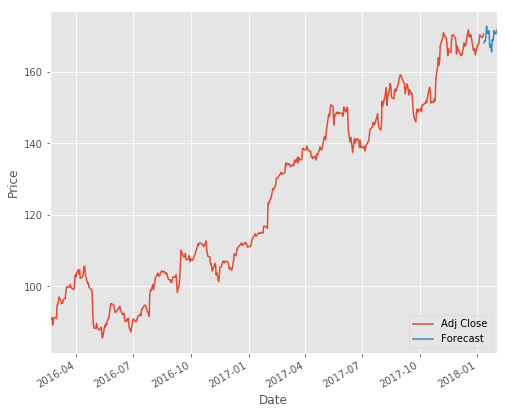

In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()